In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# hyper parameters
vocab_size = 2000
embedding_dim = 12
max_length = 20
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
# validate on the rest

In [5]:
import wget
# download our data
wget.download("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json", out="/tmp/sarcasm.json")

'/tmp/sarcasm (1).json'

In [6]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 12)            24000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                312       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 24,337
Trainable params: 24,337
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 1s - loss: 0.5425 - accuracy: 0.7225 - val_loss: 0.3989 - val_accuracy: 0.8250
Epoch 2/30
20000/20000 - 1s - loss: 0.3513 - accuracy: 0.8468 - val_loss: 0.3709 - val_accuracy: 0.8272
Epoch 3/30
20000/20000 - 1s - loss: 0.3190 - accuracy: 0.8609 - val_loss: 0.3732 - val_accuracy: 0.8258
Epoch 4/30
20000/20000 - 1s - loss: 0.3060 - accuracy: 0.8662 - val_loss: 0.3764 - val_accuracy: 0.8301
Epoch 5/30
20000/20000 - 1s - loss: 0.2990 - accuracy: 0.8701 - val_loss: 0.3855 - val_accuracy: 0.8286
Epoch 6/30
20000/20000 - 1s - loss: 0.2946 - accuracy: 0.8707 - val_loss: 0.3858 - val_accuracy: 0.8286
Epoch 7/30
20000/20000 - 1s - loss: 0.2915 - accuracy: 0.8720 - val_loss: 0.3950 - val_accuracy: 0.8223
Epoch 8/30
20000/20000 - 1s - loss: 0.2897 - accuracy: 0.8741 - val_loss: 0.3944 - val_accuracy: 0.8283
Epoch 9/30
20000/20000 - 

In [41]:
history

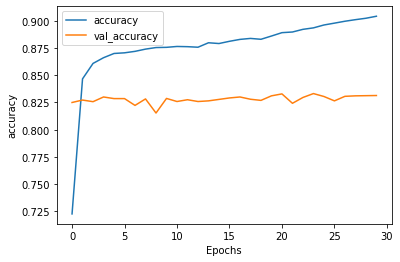

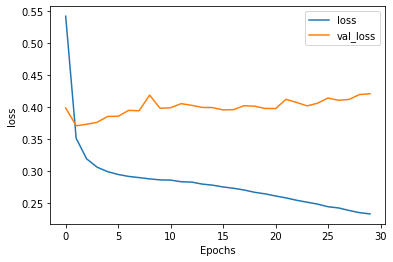

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [13]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.7367925 ]
 [0.04853459]]
